In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("bank-full.csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.duplicated().sum()

0

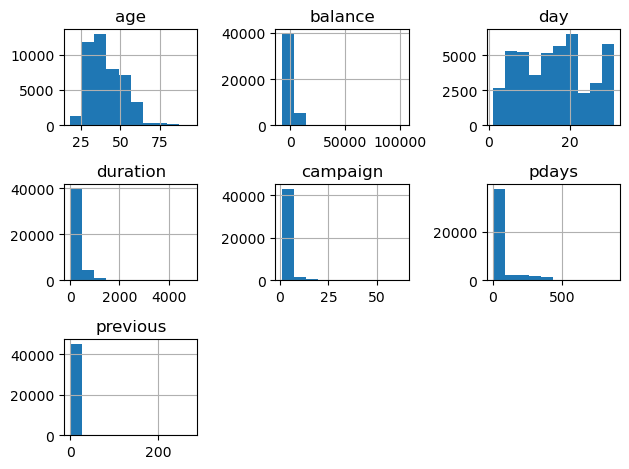

In [33]:
df.hist()
plt.tight_layout()

In [6]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

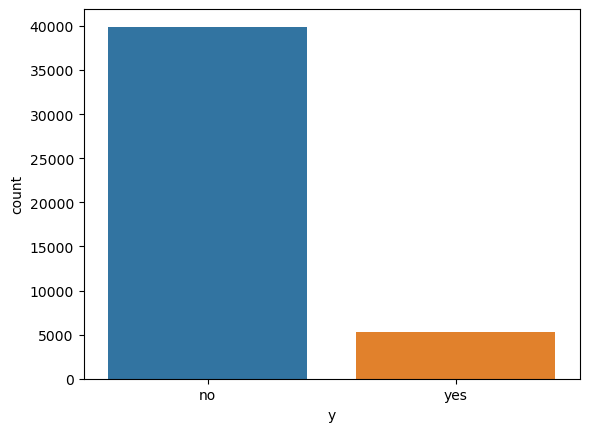

In [7]:
## To Balancing of data
sns.countplot(df['y'])

In [8]:
## Data is very imbalance

# Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
df['job']=le.fit_transform(df['job'])

In [40]:
df['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [41]:
df['marital']=le.fit_transform(df['marital'])

In [42]:
df['marital'].unique()

array([1, 2, 0])

In [44]:
df['education']=le.fit_transform(df['education'])

In [48]:
df['default']=le.fit_transform(df['default'])
df['default'].unique()

array([0, 1], dtype=int64)

In [50]:
df['housing']=le.fit_transform(df['housing'])
df['housing'].unique()

array([1, 0], dtype=int64)

In [51]:
df['loan']=le.fit_transform(df['loan'])


In [52]:
df['contact']=le.fit_transform(df['contact'])
df['contact'].unique()

array([2, 0, 1])

In [53]:
df['month']=le.fit_transform(df['month'])
df['month'].unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [54]:
df['poutcome']=le.fit_transform(df['poutcome'])
df['poutcome'].unique()

array([3, 0, 1, 2])

In [55]:
df['y']=le.fit_transform(df['y'])

# Contribution in target column

In [56]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


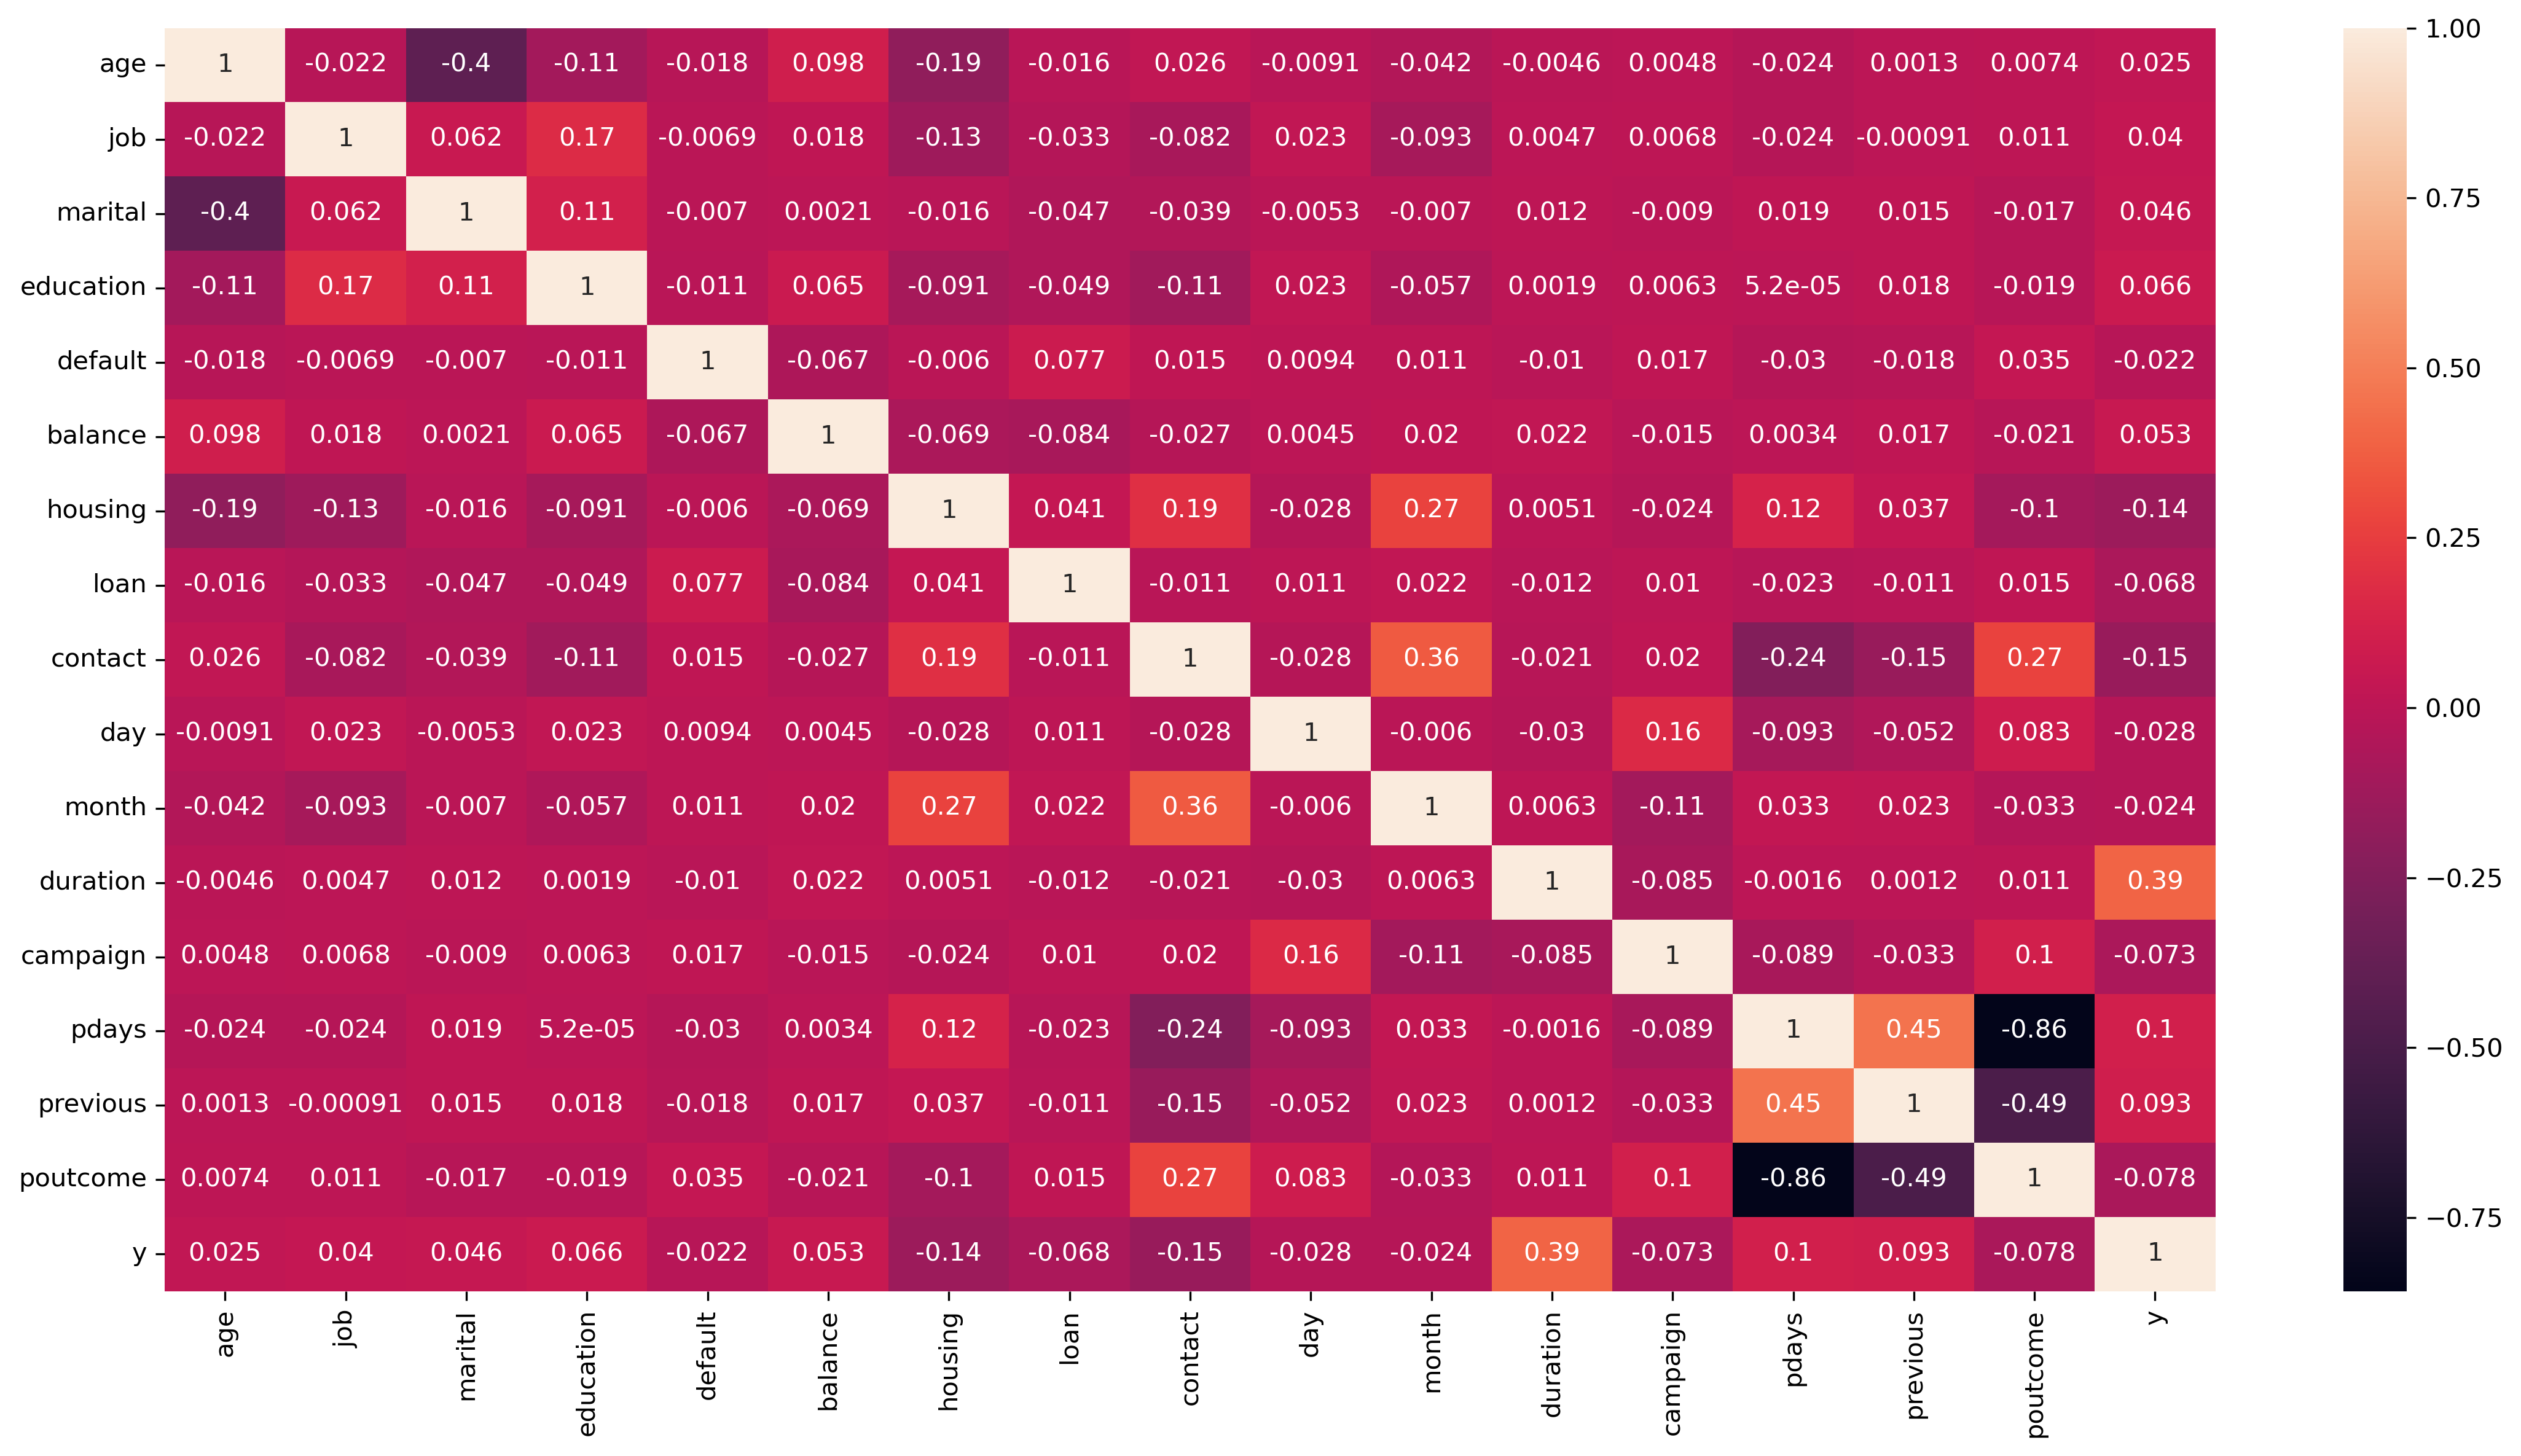

In [59]:
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['figure.dpi']=300
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

In [60]:
 # age,default,day,month are not contributing more .

In [61]:
df=df.drop(columns='age')

In [62]:
df

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [64]:
df=df.drop(columns=['default','day','month'])

In [65]:
df

,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,4,1,2,2143,1,0,2,261,1,-1,0,3,0
1,9,2,1,29,1,0,2,151,1,-1,0,3,0
2,2,1,1,2,1,1,2,76,1,-1,0,3,0
3,1,1,3,1506,1,0,2,92,1,-1,0,3,0
4,11,2,3,1,0,0,2,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,825,0,0,0,977,3,-1,0,3,1
45207,5,0,0,1729,0,0,0,456,2,-1,0,3,1
45208,5,1,1,5715,0,0,0,1127,5,184,3,2,1
45209,1,1,1,668,0,0,1,508,4,-1,0,3,0


# Model Building

In [66]:
x=df.iloc[:,:-1]
y=df['y']

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [68]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Prediction

In [73]:
ypred_df=pd.DataFrame({'Actual values':ytest,
                       'Predicted values':ypred})
ypred_df

,Actual values,Predicted values
3610,0,0
11677,0,0
33018,0,0
44323,1,0
8119,0,0
...,...,...
22959,0,0
26059,0,0
18593,0,0
6959,0,0


In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.54      0.18      0.27      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [ ]:
# Model is not performing well

# Threshold Selection

In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[7830  163]
 [ 857  193]]


Text(476.6666666666667, 0.5, 'predicted values')

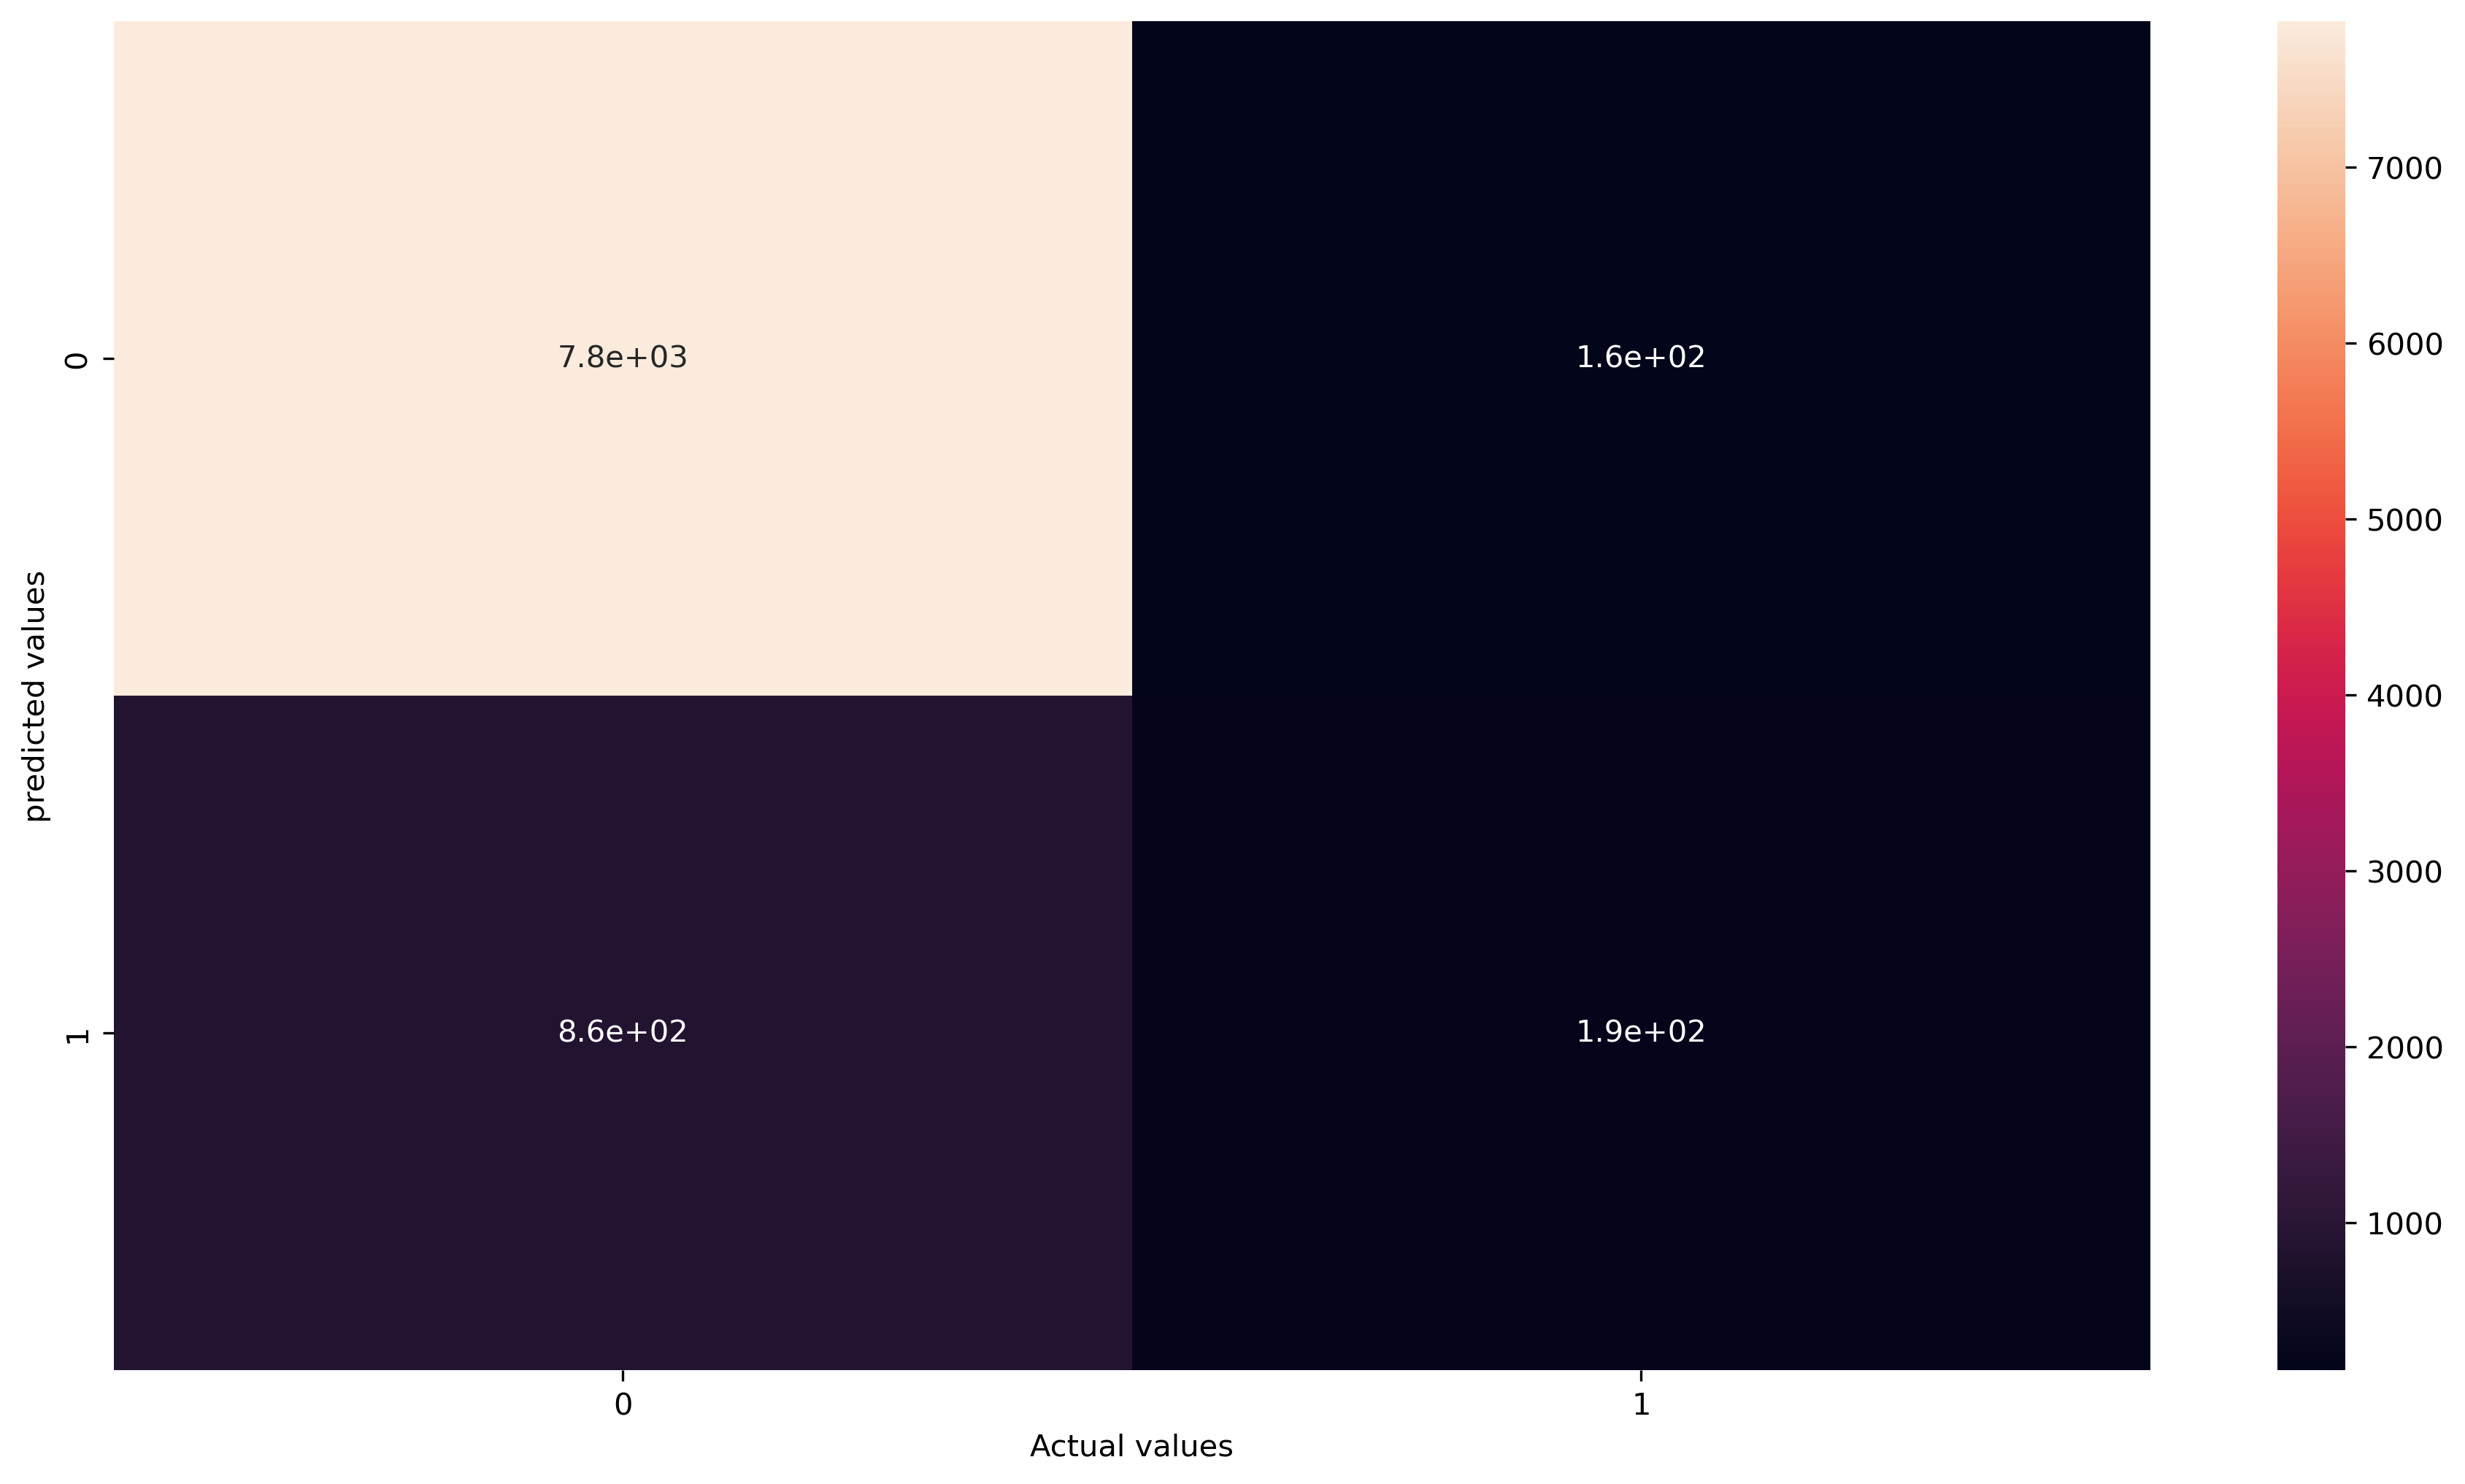

In [75]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.xlabel('Actual values')
plt.ylabel('predicted values')


In [76]:
proba=lg.predict_proba(xtest)[:,1]

In [77]:
proba

array([0.0273567 , 0.03885553, 0.36797433, ..., 0.09639562, 0.00714843,
       0.08763376])

In [78]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

In [79]:
fpr,tpr,thres=roc_curve(ytest,proba)

In [81]:
thres

array([1.99993157e+00, 9.99931575e-01, 9.99919244e-01, ...,
       1.40857914e-02, 1.40853520e-02, 2.25853456e-04])

In [83]:
auc=roc_auc_score(ytest,proba)
auc

0.8315328293208939

In [84]:
Accuracy=[]
for i in  thres:
    ypred=np.where(proba>i,1,0)
    Accuracy.append(accuracy_score(ytest,ypred))
    

In [86]:
f_thres=pd.DataFrame({'Treshold':thres,
                     'Accuracy':Accuracy})
f_thres

,Treshold,Accuracy
0,1.999932,0.883888
1,0.999932,0.883888
2,0.999919,0.883778
3,0.996196,0.883888
4,0.995158,0.883999
...,...,...
1546,0.014314,0.167754
1547,0.014295,0.167643
1548,0.014086,0.165874
1549,0.014085,0.165764


In [87]:
f_thres.sort_values(by='Accuracy',ascending=False)

,Treshold,Accuracy
218,0.448831,0.887648
219,0.447682,0.887537
217,0.448872,0.887537
216,0.449784,0.887427
170,0.494495,0.887427
...,...,...
1546,0.014314,0.167754
1547,0.014295,0.167643
1548,0.014086,0.165874
1549,0.014085,0.165764


In [88]:
from sklearn.preprocessing import binarize

In [89]:
ypred=binarize([proba],threshold=0.448831)[0]

In [90]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7993
           1       0.54      0.23      0.32      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043

